<a href="https://colab.research.google.com/github/kimgm1018/kimgm/blob/main/%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%B0%BD%EC%8B%9C%EC%9E%90%EC%97%90%EA%B2%8C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**신경망을 위한 데이터 표현**


tensor = 데이터를 위한 컨테이너

scalar = 하나의 숫자만 담고있는 tensor => 0차원이라 축이 없음

vector = 숫자의 배열 (배열안의 원소의 갯수에 따라 n차원 vector로 부름, 축 또한n개) - 
**5D vector 와 5D tensor는 명백히 다르다**

2D tensor(행열) - 2차원 배열

3D tensor&고차원 tensor -- 보통 딥러닝에서는 4D까지 사용한다.

##**tensor의 핵심속성 - 텐서는 3개의 핵심속성을 지닌다.**
축의 갯수 = numpy의 ndim을 통해 알수있다

shape(크기) = 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 듀플 - 스칼라는 () -> 즉 크기가 없다

데이터 타입(numpy에서는 dtype에 저장된다) = 텐서에 포함된 데이터의 타입(주로 flaot32, flaot64, unit8)


In [ ]:
#mnist에서 사용했던 데이터를 보자
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)
#즉 28*28 크기의 정수 행열이 6만개 -> 축이 3개(각각의 행열은 이미지 한장)

3
(60000, 28, 28)
uint8


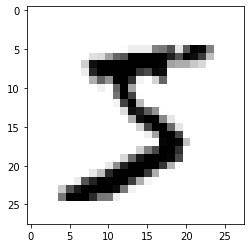

In [ ]:
#mnist의 이미지 출력
digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

(90, 28, 28)


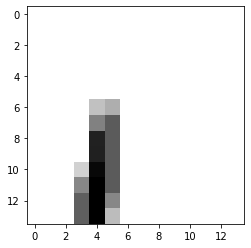

In [ ]:
#넘파이로 텐서 조작하기
my_slice = train_images[10:100] # 90개의 이미지-28*28
print(my_slice.shape) #이는 | my_slice = train_images[10:100,:,:], my_slice = train_images[10:100,0:28,0:28] | 과 같다
sample = train_images[2,0:14,0:14] #이런식으로 조절도 가능 - 왼쪽위 14*14픽셀만큼 
plt.imshow(sample, cmap=plt.cm.binary)
plt.show()

배치 데이터 - 딥러닝에서 전제 데이터 셋을 한꺼번에 처리하지 않고 데이터를 작은 배치(batch)로 나눈다음 처리한다.

batch = train_images[:128]

batch = train_images[128:256]

batch = train_images[128*n:128(n+1)

###tensor의 실제 사례


1.   벡터 데이터 : (samples, features) 크기의 2D 텐서
2.   시계열 데이터 or 시퀸스(Sequence)데이터 : (smaples, timesteps, features) 크기의 3D 탠서
3.이미지 : (samples, height, width, channels) or (samples, channels, height, width) 크기의 4D 텐서
4.동영상 : (samples, frames, height, width, channels) or (samples, frames, channels, height, width) 크기의 5D 텐서

###**vector 데이터 - 대부분의 경우에 해당**
하나의 데이터가 바로 벡터로 인코딩 될 수 있다(posible) 즉 2D의 텐서가 있는데 이때 0번째 축이 샘플 축, 두번쨰 축이 특성축이 된다.

ex) 사람의 나이, 우편번호, 소득으로 구성된 인구 통계 데이터, 각 사람은 3가지 데이터를 가진 벡터가 된다. -> 인구 10만명인 도시의 전체 데이터 셋은 (100000, 3)이 된다

###**시계열 또는 시퀀스 데이터**
데이터에서 시간/연속된 순서가 중요할 때는 시간 축을 포함하여 3D텐서로 저장 -> 샘플 데이터는 2D 데이터이므로 배치 데이터는 2D들이 모인것 == 3D텐서가 된다

ex)주식가격 데이터 셋 = 1분마다 현재 주식 가격, 지난 1분 동안의 최소 가격과 최대가격을 저장, 3D 벡터로 인코딩(3D 텐서가 아님)된 하루의 데이터 셋을 하나의 셈플 데이터로 만듦 -> 3D텐서 완성

###**이미지 데이터**
이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원(흑백 사진은 2차원에 저장할 수 있지만 관례적으로 3차원에 저장)

ex)256 X 256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1)로 나타낼 수 있다. - 컬러라면 마지막이 3(RGB)

이미지 텐서를 정하는 방식은 2가지 체널 마지막/ 체널 우선 방식이 있음(케라스는 둘다 지원)

###**비디오 데이터**
5D 텐서가 필요한 몇 안되는 데이터 중 하나

비디오는 프레임의 연속 -> 프레임은 (height, width, color_depth)로 구성된 3D tensor -> 프레임의 연속은 프레임 + (frames) -> 동영상은 (smaples, 연속된 프레임)

ex)60초 짜리 144X256 비디오 클립을 초당 4프레임으로 샘플링 클립을 4개가진 동영상은 (4, 240(초당 4프레임 이므로 60초는 240프레임), 144, 256, 3)

#**신경망의 톱니바퀴: 텐서 연산**
이진수 계산(and, or, nor)연산자 처럼 텐서 연산또한 가능하다.

##**원소별 계산**
relu함수와 덧셈은 원소별 연산이다. 이 연산은 텐서에 있는 각 원소에 독립적으로 적용된다.

In [ ]:
#파이썬으로 구현하는 relu
def naive_relu(x):
  assert len(x.shape) == 2 #assert함수는 뒤의 조건이 참이 아니라면 에러를 발생시킨다.
  #len(x.shape) == 2 란 말은 2D 텐서이면 이란 말(2x2 행열이라면 x.shape가(2,2)로 나오기 때문)

  x = x.copy() #입력 텐서를 바꾸면 안되니까 복사
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j], 0) #0보다 크면 x의 텐서를 반환, 0보다 작으면 0을 반환
  return x

#파이썬으로 구현하는 텐서 덧샘
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape

  x = x.copy
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

이는 c 기반인 numpy에서 효율적으로 계산 가능

In [ ]:
#numpy의 relu계산
import numpy as np
x = np.array([[1,0],[-1,-3]])
z = np.maximum(x, 0)
z

#numpy의 덧샘
y = ([[2,4],[4,-4]])
i = x + y
i

array([[ 3,  4],
       [ 3, -7]])

##**브로드캐스팅**
크기가 다른 두 텐서가 더해질 때 무슨 일이 일어날까?

1. 큰 텐서에 ndim에 맞춰 작은 텐서에 브로드캐스팅축을 추가

2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞게 반복

##**텐서 점곱**
tensorflow에서는 tf.matmul(x,y)//keras에서는 dot()연산을 쓴다

다 적기 힘드니 교제 73~76을 볼것

##**탠서 크기변환**


In [ ]:
#텐서 크기변환 예
import numpy as np
x = np.array([[0,1],
              [2,3],
              [4,5]])
print(x.shape)
x = x.reshape(6,1)
print(x)
x = np.zeros((300,20))
x = np.transpose(x)
print(x.shape)

(3, 2)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
(20, 300)


In [ ]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(
    num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics =[metrics.binary_accuracy])

In [ ]:
x_val = x_train[0:10000]
partial_x_train = x_train[10000:]
y_val = y_train[0:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.5825 - acc: 0.7055 - val_loss: 0.3768 - val_acc: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3146 - acc: 0.9037 - val_loss: 0.3387 - val_acc: 0.8635
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2275 - acc: 0.9279 - val_loss: 0.2819 - val_acc: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1751 - acc: 0.9438 - val_loss: 0.2861 - val_acc: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1465 - acc: 0.9529 - val_loss: 0.2869 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1189 - acc: 0.9649 - val_loss: 0.2967 - val_acc: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0941 - acc: 0.9742 - val_loss: 0.3090 - val_acc: 0.8844
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0775 - a

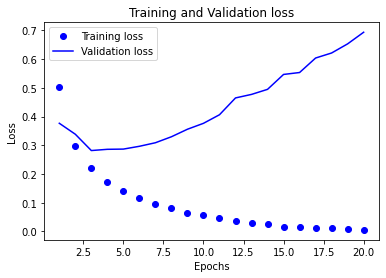

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.5685 - accuracy: 0.7221
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2798 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2029 - accuracy: 0.9327
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3079 - accuracy: 0.8788


In [ ]:
model.predict(x_test)

array([[0.21695122],
       [0.9980352 ],
       [0.96554685],
       ...,
       [0.15132234],
       [0.10283262],
       [0.6891588 ]], dtype=float32)

In [ ]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(
    num_words=10000
)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
import numpy as np

def vectorize_sequneces(sequnece, dimension=10000):
  results = np.zeros((len(sequnece), dimension))
  for i, sequences in enumerate(sequnece):
    results[i,sequences] = 1.
  return results

x_train = vectorize_sequneces(train_data)
x_test = vectorize_sequneces(test_data)

y_train =np.asarray(train_labels).astype('float32')
y_test =np.asarray(test_labels).astype('float32')


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics =  ['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 2s 49ms/step - loss: 0.0668 - acc: 0.9798 - val_loss: 0.4233 - val_acc: 0.8698
Epoch 2/4
30/30 [==============================] - 1s 34ms/step - loss: 0.0326 - acc: 0.9930 - val_loss: 0.4300 - val_acc: 0.8761
Epoch 3/4
30/30 [==============================] - 1s 30ms/step - loss: 0.0260 - acc: 0.9958 - val_loss: 0.4579 - val_acc: 0.8725
Epoch 4/4
30/30 [==============================] - 1s 29ms/step - loss: 0.0203 - acc: 0.9968 - val_loss: 0.4959 - val_acc: 0.8739


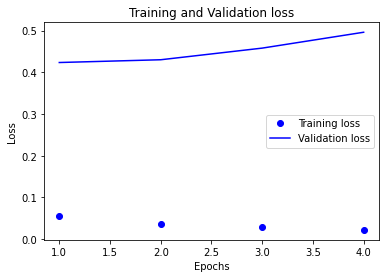

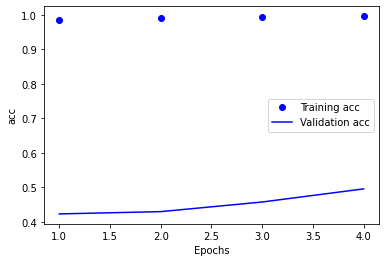

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc = history_dict['acc']
val_loss = history_dict['val_loss']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_loss,'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
model.predict(x_test)

array([[0.03787377],
       [0.9999925 ],
       [0.8959856 ],
       ...,
       [0.03143314],
       [0.02585134],
       [0.9332903 ]], dtype=float32)

In [ ]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(
    num_words = 10000)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape =(train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer = 'rmsprop',
                loss = 'mse',
                metrics = ['mae'])
  return model

In [ ]:
import numpy as np

#겹폴드교차 갯수
k = 4

num_val_sample = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('처리중인 폴드 = %d' %i)
  val_data = train_data[i * num_val_sample: (i+1)*num_val_sample]
  val_targets = train_targets[i * num_val_sample: (i+1)*num_val_sample]

  partial_train_data = np.concatenate(
      [train_data[: i * num_val_sample],
       train_data[(i+1) * num_val_sample:]],
       axis = 0)
  partial_trian_targets = np.concatenate(
      [train_targets[: i * num_val_sample],
       train_targets[(i+1) * num_val_sample:]],
       axis = 0)
  
  model = build_model()
  model.fit(partial_train_data, partial_trian_targets,
            epochs=num_epochs, batch_size = 1, verbose = 0)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 1)
  all_scores.append(val_mae)

처리중인 폴드 = 0
4/4 [==============================] - 0s 3ms/step - loss: 7.5294 - mae: 2.1262
처리중인 폴드 = 1
4/4 [==============================] - 0s 3ms/step - loss: 10.1758 - mae: 2.3746
처리중인 폴드 = 2
4/4 [==============================] - 0s 3ms/step - loss: 16.0373 - mae: 2.6703
처리중인 폴드 = 3
4/4 [==============================] - 0s 3ms/step - loss: 14.1260 - mae: 2.7008


In [ ]:
np.mean(all_scores)

2.467980206012726

In [ ]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('처리중인 폴드 = %d' %i)

  val_data = train_data[i * num_val_sample: (i+1)*num_val_sample]
  val_targets = train_targets[i * num_val_sample: (i+1)*num_val_sample]

  partial_train_data = np.concatenate(
      [train_data[: i * num_val_sample],
       train_data[(i+1) * num_val_sample:]],
       axis = 0)
  partial_trian_targets = np.concatenate(
      [train_targets[: i * num_val_sample],
       train_targets[(i+1) * num_val_sample:]],
       axis = 0)

  model = build_model()
  history = model.fit(partial_train_data, partial_trian_targets,
                      validation_data=(val_data, val_targets),
                      epochs = num_epochs, batch_size = 1,verbose = 0)
  
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

처리중인 폴드 = 0
처리중인 폴드 = 1
처리중인 폴드 = 2
처리중인 폴드 = 3


In [ ]:
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

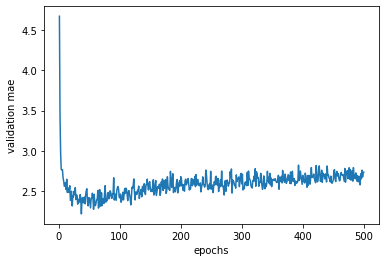

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) +1), average_mae_history)

plt.xlabel('epochs')
plt.ylabel('validation mae')

plt.show()

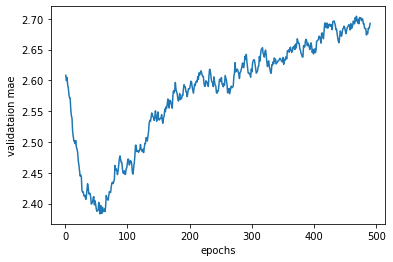

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      p 
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) +1), smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel('validataion mae')
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose = 1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


In [ ]:
test_mae_score

2.5858867168426514

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32')/255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 10s 3ms/step - loss: 0.3933 - accuracy: 0.8738
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0502 - accuracy: 0.9838
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0312 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0236 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0179 - accuracy: 0.9945


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0337 - accuracy: 0.9909


0.9908999800682068